In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import folium

## 데이터 요약하기
info, shape, nunique, head, sample

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cryptnomy/likelion-ai-s7-mid/master/data/%ED%95%9C%EA%B5%AD%EC%A0%84%EB%A0%A5%EA%B3%B5%EC%82%AC_%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EC%A0%84%EA%B8%B0%EC%B0%A8%20%EC%B6%A9%EC%A0%84%EC%86%8C%20%EC%B6%A9%EC%A0%84%EB%9F%89_20220331.csv')

In [3]:
df

충전구분     충전소명                  주소  충전기용량    충전량  충전시간  충전분  \
0        급속  영등포전력지사  서울특별시 영등포구 경인로 878   50.0   0.05     0    0   
1        급속  영등포전력지사  서울특별시 영등포구 경인로 878   50.0  13.10     0   29   
2        급속  영등포전력지사  서울특별시 영등포구 경인로 878   50.0  47.56     1   33   
3        급속  영등포전력지사  서울특별시 영등포구 경인로 878   50.0  24.77     0   38   
4        급속  영등포전력지사  서울특별시 영등포구 경인로 878   50.0  19.21     0   29   
...     ...      ...                 ...    ...    ...   ...  ...   
638697   급속  서울전력관리처    서울특별시 중구 퇴계로 140   50.0  41.67     1   21   
638698   급속  서울전력관리처    서울특별시 중구 퇴계로 140   50.0  29.07     0   44   
638699   급속  서울전력관리처    서울특별시 중구 퇴계로 140   50.0  55.65     1   21   
638700   급속  서울전력관리처    서울특별시 중구 퇴계로 140   50.0  21.48     1    3   
638701   급속  서울전력관리처    서울특별시 중구 퇴계로 140   50.0  13.56     0   24   

                     충전시작시각               충전종료시각  
0       2021-01-01 02:06:20  2021-01-01 02:06:36  
1       2021-01-02 14:58:37  2021-01-02 15:28:25  
2       2021-01-02 20:57:53  2021-01-02 22:31:46  
3       2021-01-04 12:12:02  2021-01-04 12:51:01  
4       2021-01-04 22:51:11  2021-01-04 23:21:04  
...                     ...                  ...  
638697  2022-03-31 09:44:33  2022-03-31 11:05:57  
638698  2022-03-31 12:17:56  2022-03-31 13:02:54  
638699  2022-03-31 16:57:11  2022-03-31 18:19:04  
638700  2022-03-31 13:06:18  2022-03-31 14:09:20  
638701  2022-03-31 07:27:01  2022-03-31 07:51:39  

[638702 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638702 entries, 0 to 638701
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   충전구분    638702 non-null  object 
 1   충전소명    638702 non-null  object 
 2   주소      638702 non-null  object 
 3   충전기용량   631208 non-null  float64
 4   충전량     638702 non-null  float64
 5   충전시간    638702 non-null  int64  
 6   충전분     638702 non-null  int64  
 7   충전시작시각  638702 non-null  object 
 8   충전종료시각  638702 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 43.9+ MB


In [5]:
df.shape

(638702, 9)

In [6]:
df.nunique()

충전구분           2
충전소명         625
주소           611
충전기용량          3
충전량         9563
충전시간         127
충전분           60
충전시작시각    631123
충전종료시각    621088
dtype: int64

## 데이터 전처리
- 결측값 처리
- 중복값 확인 및 제거
- 데이터 형식 바꾸기
- 필요없는 컬럼 삭제
- downcast

In [7]:
df.isnull().sum()

충전구분         0
충전소명         0
주소           0
충전기용량     7494
충전량          0
충전시간         0
충전분          0
충전시작시각       0
충전종료시각       0
dtype: int64

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [충전구분, 충전소명, 주소, 충전기용량, 충전량, 충전시간, 충전분, 충전시작시각, 충전종료시각]
Index: []

In [9]:
df['충전시작시각'] = pd.to_datetime(df['충전시작시각'])

In [10]:
df['충전종료시각'] = pd.to_datetime(df['충전종료시각'])

In [11]:
df = df.drop(columns = '충전기용량')

In [12]:
for col in df.columns:
    if df[col].dtype.name.startswith('float') : 
        df[col] = pd.to_numeric(df[col], downcast = 'float')
    elif df[col].dtype.name.startswith('int') :
        if (df[col].min() >= 0) : 
            df[col] = pd.to_numeric(df[col], downcast = 'unsigned')
        else : 
            df[col] = pd.to_numeric(df[col], downcast = 'signed')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638702 entries, 0 to 638701
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   충전구분    638702 non-null  object        
 1   충전소명    638702 non-null  object        
 2   주소      638702 non-null  object        
 3   충전량     638702 non-null  float32       
 4   충전시간    638702 non-null  uint32        
 5   충전분     638702 non-null  uint8         
 6   충전시작시각  638702 non-null  datetime64[ns]
 7   충전종료시각  638702 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float32(1), object(3), uint32(1), uint8(1)
memory usage: 29.8+ MB


## 이상치 처리
- 주소가 서울시가 아닌 데이터 삭제
- 주소에 오류가 있는 데이터 삭제
- 충전시작시각과 충전 종료시각 사이가 14시간 이상인 데이터 삭제(전기차 완속충전기 14시간 이상 점유시 과태료 10만원)

In [14]:
# 서울특별시 데이터만 남기기
df = df[df['주소'].str.startswith('서울특별시')]

In [15]:
df = df[~((df['충전종료시각'] - df['충전시작시각']) >= '0 days 14:00:00')]

In [16]:
# 주소에 오류가 있는 데이터 삭제 -> 가끔 주소가 서울특별시 null null null null인 데이터 존재
df = df[~df['주소'].str.contains('null')]

## 파생변수 만들기
- 자치구 이름 및 자치구 코드
- 급속충전기 및 완속충전기 개수
- 위도 및 경도
- 요일
- 총 충전시간
- 날짜가 바뀌는 데이터 나누어주기
- 시간대 더미변수 만들기

In [17]:
df['자치구'] = df['주소'].str.split(expand = True)[1]
df['자치구']

0         영등포구
1         영등포구
2         영등포구
3         영등포구
4         영등포구
          ... 
638697      중구
638698      중구
638699      중구
638700      중구
638701      중구
Name: 자치구, Length: 621120, dtype: object

In [18]:
seoul = '''1100000000 인근지역
 
1111000000 종로구
 
1114000000 중구
 
1117000000 용산구
 
1120000000 성동구
 
1121500000 광진구
 
1123000000 동대문구
 
1126000000 중랑구
 
1129000000 성북구
 
1130500000 강북구
 
1132000000 도봉구
 
1135000000 노원구
 
1138000000 은평구
 
1141000000 서대문구
 
1144000000 마포구
 
1147000000 양천구
 
1150000000 강서구
 
1153000000 구로구
 
1154500000 금천구
 
1156000000 영등포구
 
1159000000 동작구
 
1162000000 관악구
 
1165000000 서초구
 
1168000000 강남구
 
1171000000 송파구
 
1174000000 강동구'''

In [19]:
seoul_list = seoul.split("\n \n")
seoul_code = {n.split(" ")[1] : int(n.split(" ")[0][:5]) for n in seoul_list}
seoul_code

df["자치구코드"] = df["자치구"].map(seoul_code)
df["자치구코드"] = pd.to_numeric(df["자치구코드"], downcast='integer')
df['자치구코드']

0         11560
1         11560
2         11560
3         11560
4         11560
          ...  
638697    11140
638698    11140
638699    11140
638700    11140
638701    11140
Name: 자치구코드, Length: 621120, dtype: int16

In [20]:
df_2 = pd.read_excel('https://github.com/cryptnomy/likelion-ai-s7-mid/blob/master/data/%EC%A0%84%EA%B8%B0%EC%B0%A8%20%EC%B6%A9%EC%A0%84%EC%86%8C%20%EC%84%A4%EC%B9%98%ED%98%84%ED%99%A9_20221020.xls?raw=true')
df_2.columns = df_2.iloc[1]
df_2 = df_2.drop([0,1])
df_2 = df_2.rename(columns = {'설치장소' : '충전소명'})

df = df.merge(df_2[['충전소명','급속충전기(대)','완속충전기(대)']], on="충전소명", how="left")

In [21]:
df_3 = pd.read_csv('https://raw.githubusercontent.com/cryptnomy/likelion-ai-s7-mid/master/data/%ED%95%9C%EA%B5%AD%EC%A0%84%EB%A0%A5%EA%B3%B5%EC%82%AC_%EC%A0%84%EA%B8%B0%EC%B0%A8%EC%B6%A9%EC%A0%84%EC%86%8C%EC%9C%84%EA%B2%BD%EB%8F%84_20220718.csv')
df_3 = df_3.drop(columns = '시도')

In [22]:
df = pd.merge(df, df_3, on = '충전소명')

In [23]:
df['위도'], df['경도'] = df['경도'], df['위도']

In [24]:
df['요일'] = df['충전시작시각'].dt.dayofweek.map(lambda x : "월화수목금토일"[x])
df['요일']

0         금
1         토
2         토
3         월
4         월
         ..
621176    목
621177    목
621178    목
621179    목
621180    목
Name: 요일, Length: 621181, dtype: object

In [25]:
# "충전분" 시간 단위로 변환
df["총충전시간"] = df["충전시간"]+(df["충전분"]/60)

# 소수점 아래 두 자리까지 남기기
df["총충전시간"] = round(df["총충전시간"],2)

# 기존 컬럼 삭제
df = df.drop(columns=['충전시간','충전분'])

In [26]:
# 날짜가 바뀌는 데이터 쪼개어주기

df['날짜바뀜'] = df['충전시작시각'].dt.day != df['충전종료시각'].dt.day
day_over = df[df['날짜바뀜'] == True].copy()

day_over['자정'] = (day_over['충전종료시각'].dt.date.astype(str) + ' '+ "00:00:00")
day_over['자정'] = pd.to_datetime(day_over['자정'])
day_over['충전시작시각'] = day_over['자정']

df.loc[df['날짜바뀜'] == True ,'충전종료시각'] = df['충전시작시각'].dt.date.astype(str) + " 23:59:59"
df['충전종료시각'] = pd.to_datetime(df['충전종료시각'])

In [27]:
df = pd.concat([df,day_over], ignore_index = True)
df = df.drop(columns = ['날짜바뀜','자정'])

In [28]:
df.isnull().sum()

충전구분           0
충전소명           0
주소             0
충전량            0
충전시작시각         0
충전종료시각         0
자치구            0
자치구코드          0
급속충전기(대)    2219
완속충전기(대)    2219
경도             0
위도             0
요일             0
총충전시간          0
dtype: int64

In [29]:
df = df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715151 entries, 0 to 717369
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   충전구분      715151 non-null  object        
 1   충전소명      715151 non-null  object        
 2   주소        715151 non-null  object        
 3   충전량       715151 non-null  float32       
 4   충전시작시각    715151 non-null  datetime64[ns]
 5   충전종료시각    715151 non-null  datetime64[ns]
 6   자치구       715151 non-null  object        
 7   자치구코드     715151 non-null  int16         
 8   급속충전기(대)  715151 non-null  object        
 9   완속충전기(대)  715151 non-null  object        
 10  경도        715151 non-null  float64       
 11  위도        715151 non-null  float64       
 12  요일        715151 non-null  object        
 13  총충전시간     715151 non-null  float64       
dtypes: datetime64[ns](2), float32(1), float64(3), int16(1), object(7)
memory usage: 75.0+ MB


In [31]:
df['급속충전기(대)'] = pd.to_numeric(df['급속충전기(대)'], downcast = 'unsigned')
df['완속충전기(대)'] = pd.to_numeric(df['완속충전기(대)'], downcast = 'unsigned')
df['경도'] = pd.to_numeric(df['경도'], downcast = 'float')
df['위도'] = pd.to_numeric(df['위도'], downcast = 'float')
df['총충전시간'] = pd.to_numeric(df['총충전시간'], downcast = 'float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715151 entries, 0 to 717369
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   충전구분      715151 non-null  object        
 1   충전소명      715151 non-null  object        
 2   주소        715151 non-null  object        
 3   충전량       715151 non-null  float32       
 4   충전시작시각    715151 non-null  datetime64[ns]
 5   충전종료시각    715151 non-null  datetime64[ns]
 6   자치구       715151 non-null  object        
 7   자치구코드     715151 non-null  int16         
 8   급속충전기(대)  715151 non-null  uint8         
 9   완속충전기(대)  715151 non-null  uint8         
 10  경도        715151 non-null  float32       
 11  위도        715151 non-null  float32       
 12  요일        715151 non-null  object        
 13  총충전시간     715151 non-null  float32       
dtypes: datetime64[ns](2), float32(4), int16(1), object(5), uint8(2)
memory usage: 57.3+ MB


In [33]:
df['시간대벡터'] = df['충전시작시각'].dt.hour.astype(str) + ',' + df['충전종료시각'].dt.hour.astype(str)
df['시간대벡터'] = df['시간대벡터'].map(lambda x : (int(x.split(',')[0]), int(x.split(',')[1]) + 1))
df['시간대벡터']

0           (2, 3)
1         (14, 16)
2         (20, 23)
3         (12, 13)
4         (22, 24)
            ...   
717365      (0, 4)
717366      (0, 9)
717367      (0, 1)
717368      (0, 4)
717369      (0, 1)
Name: 시간대벡터, Length: 715151, dtype: object

In [34]:
for n in range(24):
    df[n] = df['시간대벡터'].map(lambda x : 1 if (n in range(x[0], x[1])) else 0)

In [35]:
df = df.drop(columns = '시간대벡터')
df.columns

Index([    '충전구분',     '충전소명',       '주소',      '충전량',   '충전시작시각',   '충전종료시각',
            '자치구',    '자치구코드', '급속충전기(대)', '완속충전기(대)',       '경도',       '위도',
             '요일',    '총충전시간',          0,          1,          2,          3,
                4,          5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,         15,
               16,         17,         18,         19,         20,         21,
               22,         23],
      dtype='object')

In [36]:
df[['충전시작시각','충전종료시각',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].sample(20).style.background_gradient()

In [37]:
df

충전구분     충전소명                  주소        충전량              충전시작시각  \
0        급속  영등포전력지사  서울특별시 영등포구 경인로 878   0.050000 2021-01-01 02:06:20   
1        급속  영등포전력지사  서울특별시 영등포구 경인로 878  13.100000 2021-01-02 14:58:37   
2        급속  영등포전력지사  서울특별시 영등포구 경인로 878  47.560001 2021-01-02 20:57:53   
3        급속  영등포전력지사  서울특별시 영등포구 경인로 878  24.770000 2021-01-04 12:12:02   
4        급속  영등포전력지사  서울특별시 영등포구 경인로 878  19.209999 2021-01-04 22:51:11   
...     ...      ...                 ...        ...                 ...   
717365   완속  서울전력관리처    서울특별시 중구 퇴계로 140  61.189999 2022-03-01 00:00:00   
717366   급속  서울전력관리처    서울특별시 중구 퇴계로 140  11.250000 2022-03-03 00:00:00   
717367   급속  서울전력관리처    서울특별시 중구 퇴계로 140  13.140000 2022-03-11 00:00:00   
717368   완속  서울전력관리처    서울특별시 중구 퇴계로 140  61.099998 2022-03-15 00:00:00   
717369   완속  서울전력관리처    서울특별시 중구 퇴계로 140  54.790001 2022-03-24 00:00:00   

                    충전종료시각   자치구  자치구코드  급속충전기(대)  완속충전기(대)  ...  14  15 16  \
0      2021-01-01 02:06:36  영등포구  11560         1         2  ...   0   0  0   
1      2021-01-02 15:28:25  영등포구  11560         1         2  ...   1   1  0   
2      2021-01-02 22:31:46  영등포구  11560         1         2  ...   0   0  0   
3      2021-01-04 12:51:01  영등포구  11560         1         2  ...   0   0  0   
4      2021-01-04 23:21:04  영등포구  11560         1         2  ...   0   0  0   
...                    ...   ...    ...       ...       ...  ...  ..  .. ..   
717365 2022-03-01 03:55:02    중구  11140         1         2  ...   0   0  0   
717366 2022-03-03 08:23:23    중구  11140         1         2  ...   0   0  0   
717367 2022-03-11 00:38:46    중구  11140         1         2  ...   0   0  0   
717368 2022-03-15 03:05:02    중구  11140         1         2  ...   0   0  0   
717369 2022-03-24 00:15:04    중구  11140         1         2  ...   0   0  0   

        17  18  19  20  21  22  23  
0        0   0   0   0   0   0   0  
1        0   0   0   0   0   0   0  
2        0   0   0   1   1   1   0  
3        0   0   0   0   0   0   0  
4        0   0   0   0   0   1   1  
...     ..  ..  ..  ..  ..  ..  ..  
717365   0   0   0   0   0   0   0  
717366   0   0   0   0   0   0   0  
717367   0   0   0   0   0   0   0  
717368   0   0   0   0   0   0   0  
717369   0   0   0   0   0   0   0  

[715151 rows x 38 columns]

### 전처리 완료 된 데이터 파일 내보내기

In [38]:
df.to_csv('hypo_2_pre.csv', index = False)

### parquet로 내보내기

In [40]:
# df.rename(columns = {x : str(x) for x in range(24)}).to_parquet('hypo_2.parqeut.gzip', compression = 'gzip')

## 기술통계값 살펴보기
- describe
- corr

In [188]:
df.iloc[:,0:14].describe()

충전량          자치구코드       급속충전기(대)       완속충전기(대)  \
count  715151.000000  715151.000000  715151.000000  715151.000000   
mean       23.028004   11474.421633       1.577851       2.326147   
std        27.234278     196.330543       1.859527       2.304197   
min         0.001000   11110.000000       0.000000       0.000000   
25%         9.400000   11305.000000       1.000000       0.000000   
50%        18.450001   11500.000000       1.000000       2.000000   
75%        34.680000   11680.000000       2.000000       3.000000   
max     16787.539062   11740.000000      11.000000      11.000000   

                  경도             위도          총충전시간  
count  715151.000000  715151.000000  715151.000000  
mean      127.613945      37.734905       2.787097  
std         0.612876       0.201023       2.838067  
min       126.800041      37.446617       0.000000  
25%       126.928139      37.498528       0.820000  
50%       127.025894      37.535698       1.670000  
75%       127.076965      37.568382       3.770000  
max       129.175720      37.687134      13.980000

In [189]:
df.iloc[:,0:14].describe(include = 'O').T

count unique                                top    freq
충전구분  715151      2                                 완속  409781
충전소명  715151    608                          용산역 아이파크몰   16266
주소    715151    597  서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)   16266
자치구   715151     25                                송파구   80528
요일    715151      7                                  금  109424

In [190]:
df.iloc[:,0:14].corr()

충전량     자치구코드  급속충전기(대)  완속충전기(대)        경도        위도     총충전시간
충전량       1.000000  0.016872  0.015248 -0.043919  0.009857  0.008267  0.284518
자치구코드     0.016872  1.000000 -0.224808 -0.053682  0.218183 -0.600404  0.082909
급속충전기(대)  0.015248 -0.224808  1.000000  0.364764 -0.107564  0.055395 -0.228795
완속충전기(대) -0.043919 -0.053682  0.364764  1.000000 -0.019946 -0.097588  0.162007
경도        0.009857  0.218183 -0.107564 -0.019946  1.000000  0.008688  0.041060
위도        0.008267 -0.600404  0.055395 -0.097588  0.008688  1.000000 -0.050259
총충전시간     0.284518  0.082909 -0.228795  0.162007  0.041060 -0.050259  1.000000

## 분석 및 시각화
- 자치구에 따른 충전 데이터 분석
- 충전소별 충전 데이터 분석
- 시간대별 충전 데이터 분석

### 자치구에 따른 충전 데이터 분석
- 자치구별 충전소 개수
- 자치구별 충전 빈도수
- 자치구별 충전 시간의 합계
- 자치구별 충전 시간의 평균

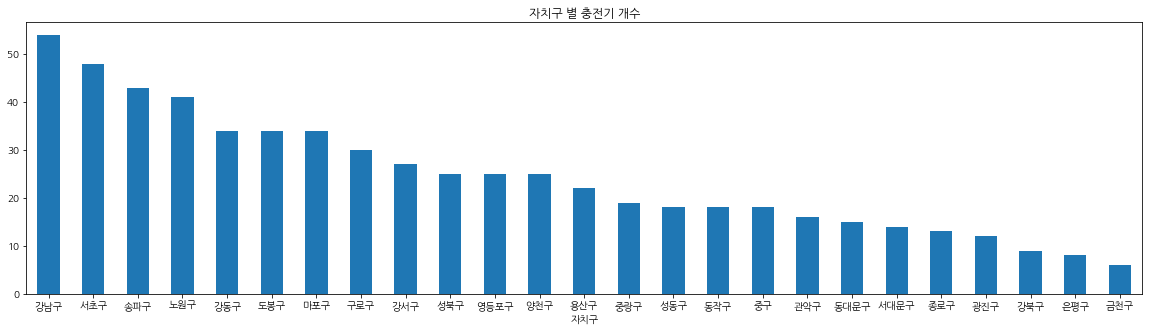

In [191]:
df.groupby('자치구')['충전소명'].nunique().sort_values(ascending=False).plot.bar(rot=0,figsize=(20,5), title = '자치구 별 충전기 개수');

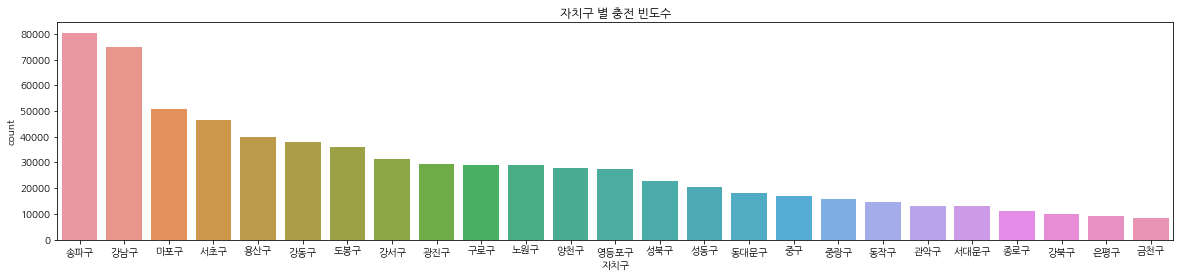

In [192]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df.sort_values("자치구"), x="자치구", order = df['자치구'].value_counts().index.tolist())
plt.title('자치구 별 충전 빈도수');

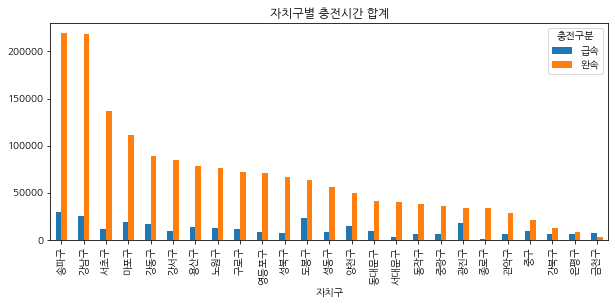

In [193]:
df.groupby(["자치구","충전구분"])["총충전시간"].sum().unstack().sort_values('완속', ascending = False).plot.bar(figsize=(10,4),title="자치구별 충전시간 합계");

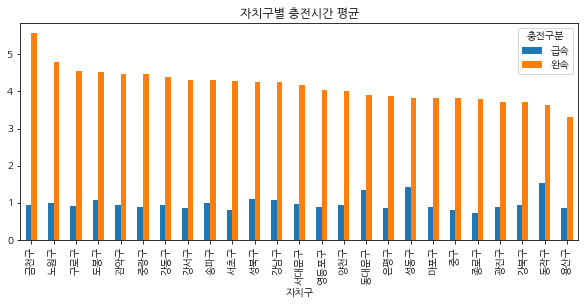

In [194]:
df.groupby(["자치구","충전구분"])["총충전시간"].mean().unstack().sort_values('완속', ascending = False).plot.bar(figsize=(10,4),title="자치구별 충전시간 평균");

## 충전소 별 충전 데이터
- 전체 충전소의 총 충전 시간 상자그림
- 전체 충전소의 총 충전량 상자그림
- 전체 충전소의 충전 빈도수 상자그림
- 이용이 가장 잦은 충전소 살펴보기

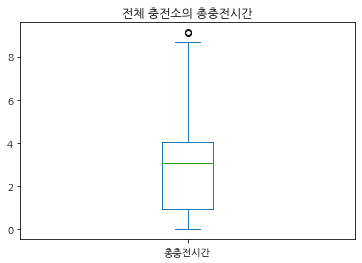

In [195]:
df.pivot_table(index="충전소명",values="총충전시간").plot.box(title="전체 충전소의 총충전시간");

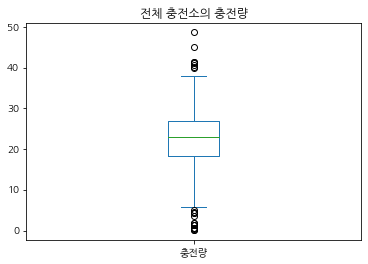

In [196]:
df.pivot_table(index="충전소명",values="충전량").plot.box(title="전체 충전소의 충전량");

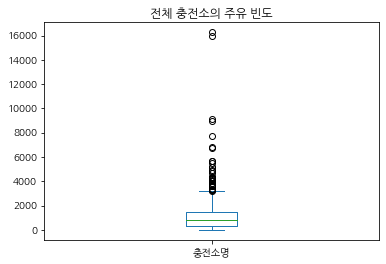

In [197]:
df["충전소명"].value_counts().plot.box(title="전체 충전소의 주유 빈도")

# 동적 시각화
px.box(df["충전소명"].value_counts(),notched=True, points="all", title="전체 충전소의 주유 빈도")

In [198]:
# 이용이 가장 잦은 충전소 살펴보기
df['충전소명'].value_counts()[:10]

용산역 아이파크몰      16266
상암월드컵경기장       15958
서울에너지공사 주차장     9161
뚝도충전소           8940
리센츠 아파트         7732
한국공항공사 서울       6855
강북성북지사(공용)      6708
강변테크노마트 주차장     5680
창동주공19단지        5654
레이크팰리스          5516
Name: 충전소명, dtype: int64

### 시간대별 충전 데이터
- 시간대에 따른 충전 빈도수 비교
- 자치구별 시간대에 따른 충전 빈도수 비교
- 요일별 시간대에 따른 충전 빈도수 비교
- 자치구별, 요일별 시간대에 따른 충전 빈도수 비교

In [199]:
time_list = [x for x in range(24)]

In [200]:
time_count = pd.DataFrame(df.melt(id_vars = ['충전구분', '충전소명', '주소', '충전량', '충전시작시각', '충전종료시각', '자치구', '자치구코드', '급속충전기(대)', '완속충전기(대)', '경도', '위도', '요일', '총충전시간'], var_name = '시간대').groupby('시간대')['value'].sum()).reset_index()

In [201]:
time_count

시간대   value
0     0  110000
1     1   95457
2     2   80643
3     3   66797
4     4   55537
5     5   47588
6     6   44408
7     7   45335
8     8   49226
9     9   54575
10   10   61234
11   11   68117
12   12   76043
13   13   80515
14   14   83041
15   15   88240
16   16   95442
17   17  104089
18   18  114210
19   19  126179
20   20  131524
21   21  129411
22   22  126163
23   23  122991

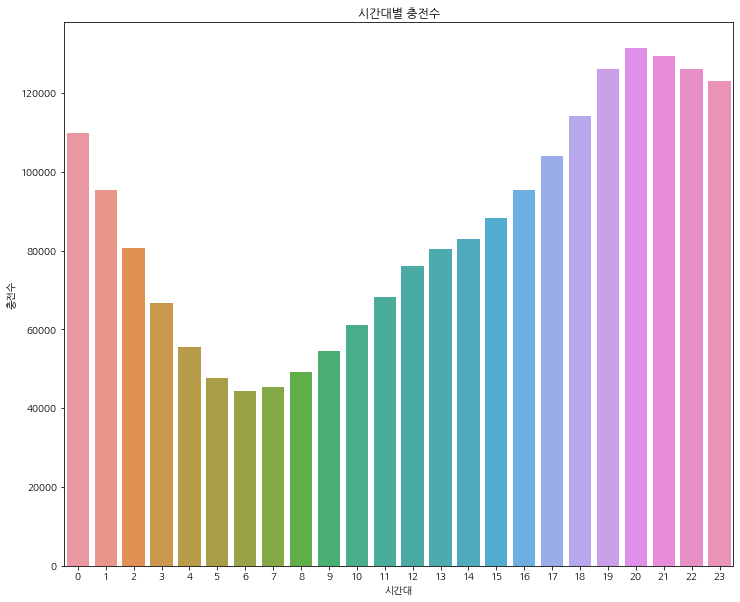

In [202]:
plt.figure(figsize = (12,10))
sns.barplot(data = time_count, x='시간대', y='value', ci = None, estimator = sum)
plt.ylabel('충전수')
plt.title('시간대별 충전수');

In [203]:
# 이렇게 할 수도 있겠다.
# pd.DataFrame(df[time_list].sum()).plot.bar(figsize = (12,10), rot = 0, xlabel = '시간대');

In [204]:
# 자치구 별 시간대에 따른 충전 빈도수 분석

df.pivot_table(index = '자치구', values = time_list, aggfunc = 'sum')
gu_time = pd.DataFrame(df.pivot_table(index = '자치구', values = time_list, aggfunc = 'sum').stack())
gu_time = gu_time.reset_index().rename(columns = {'level_1' : '시간대'})
gu_time

자치구  시간대      0
0    강남구    0  13183
1    강남구    1  11204
2    강남구    2   9431
3    강남구    3   7747
4    강남구    4   6316
..   ...  ...    ...
595  중랑구   19   2729
596  중랑구   20   3159
597  중랑구   21   3350
598  중랑구   22   3041
599  중랑구   23   2858

[600 rows x 3 columns]

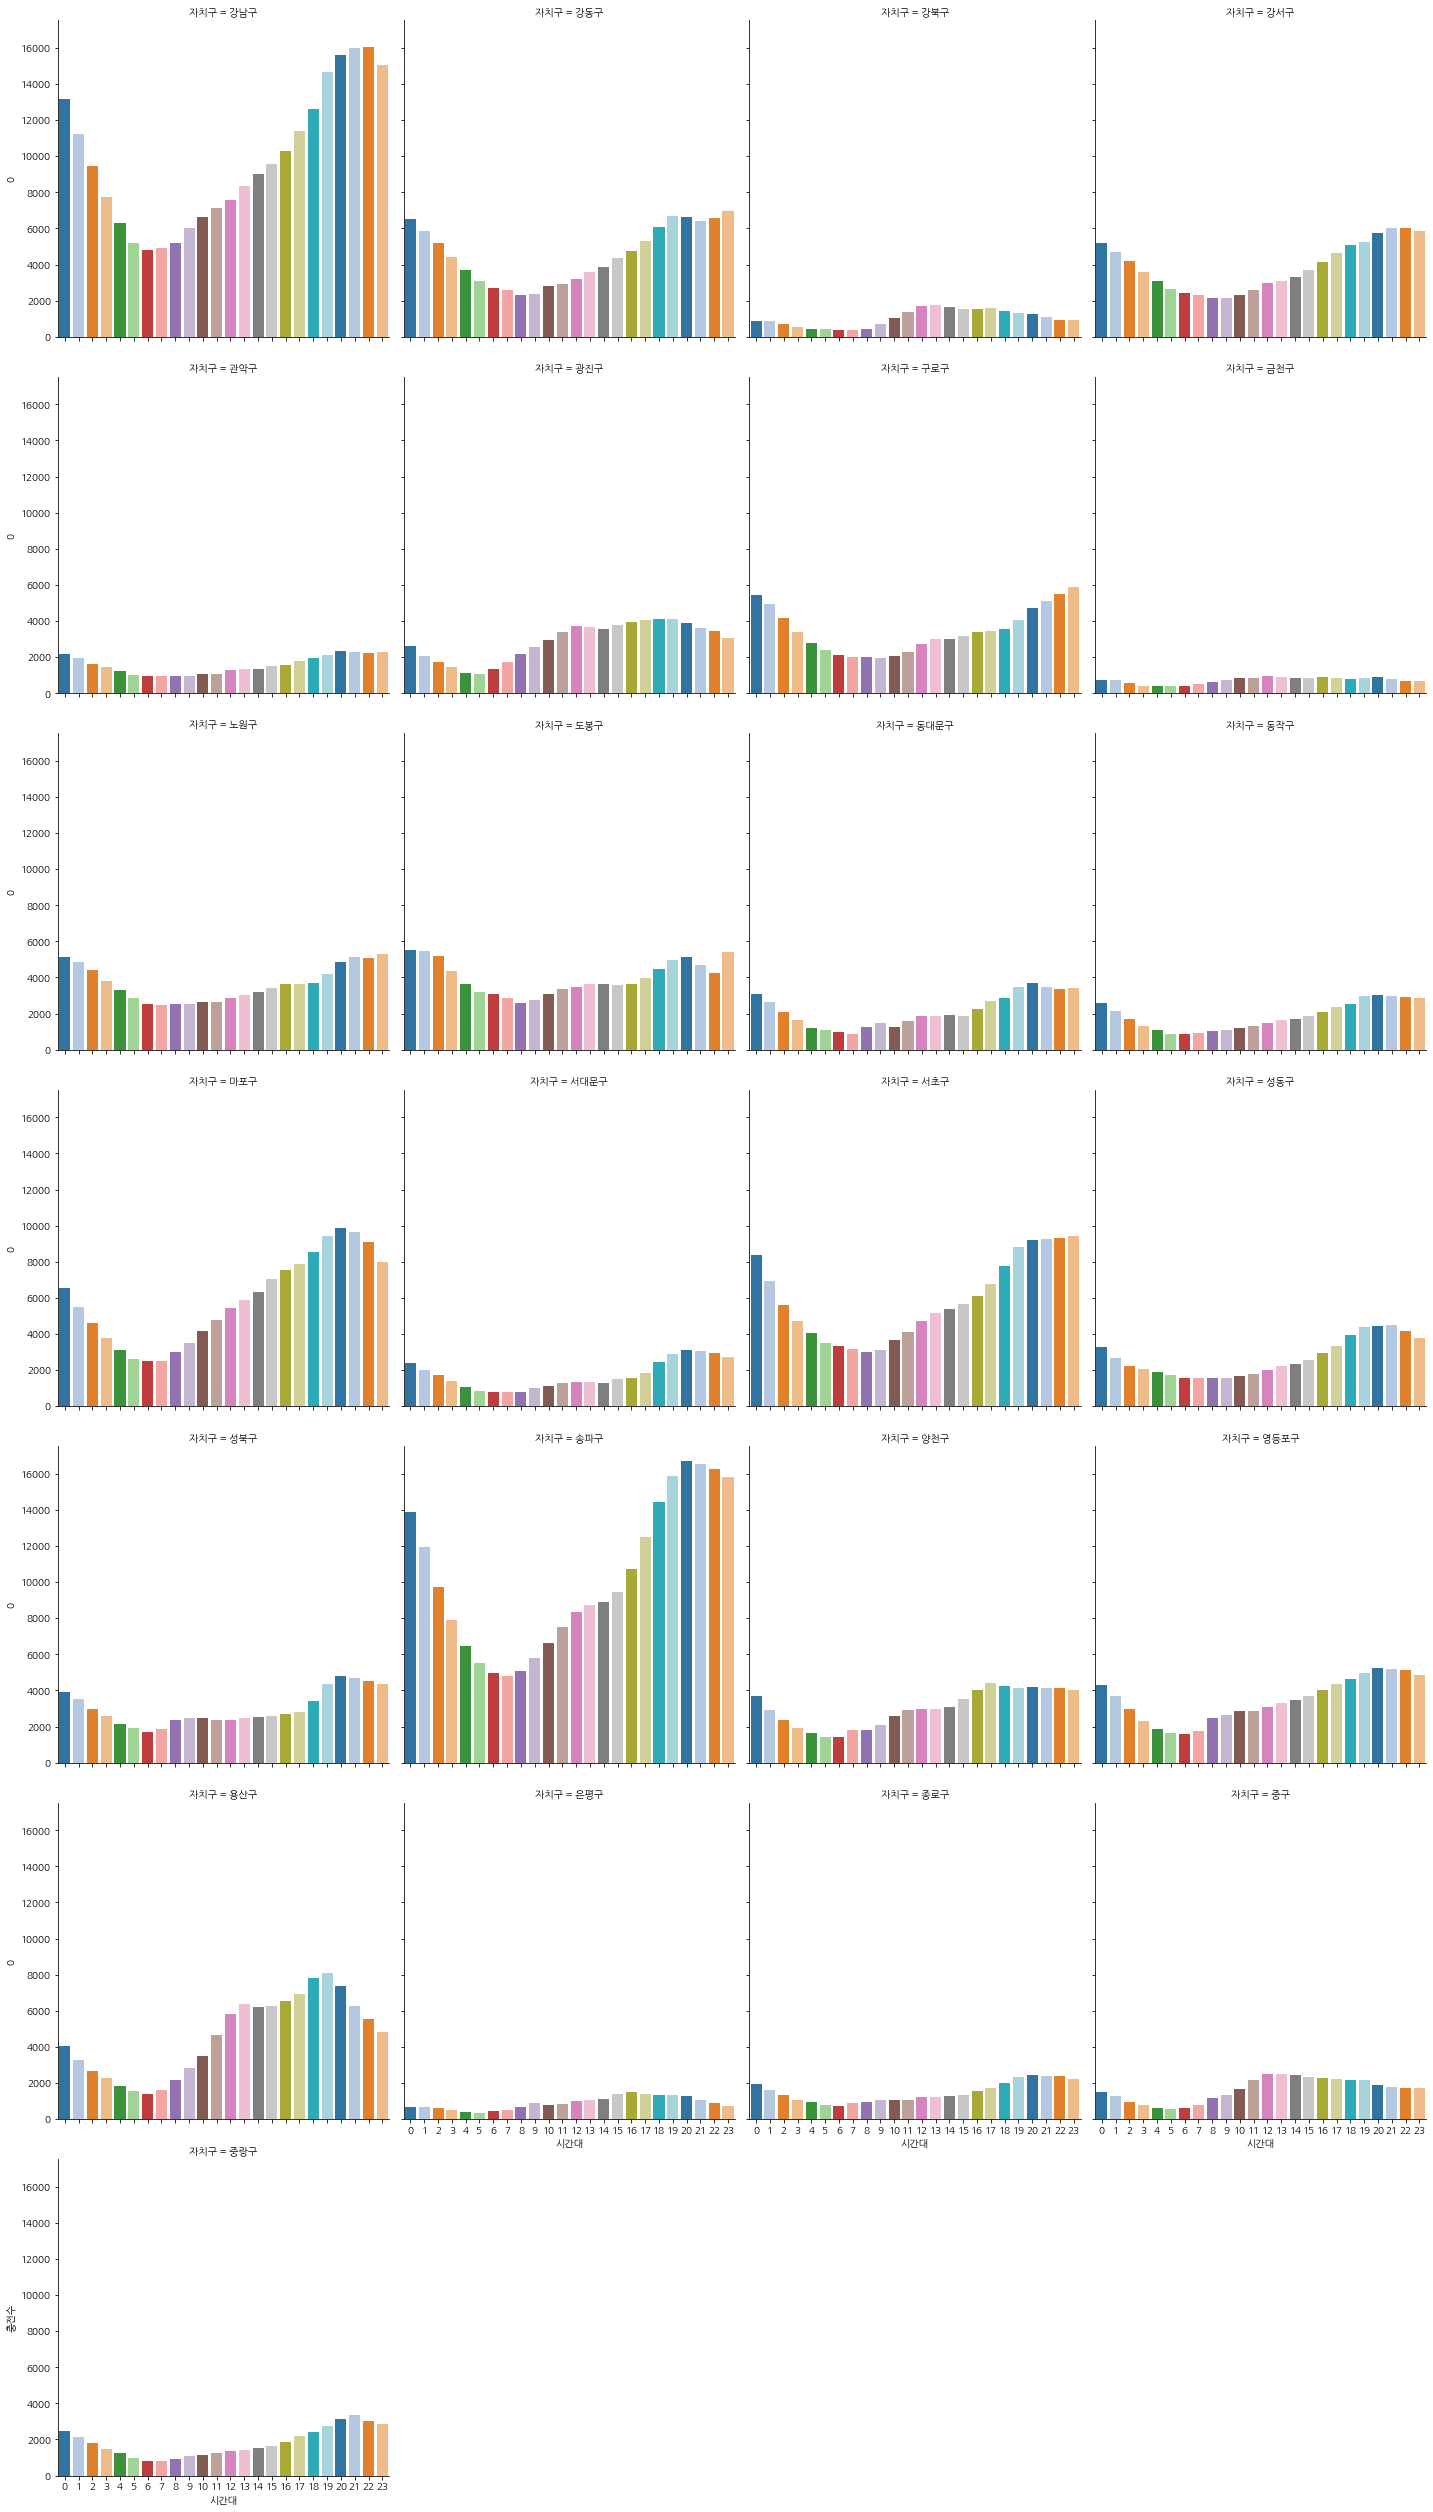

In [205]:
sns.catplot(data = gu_time, x='시간대', y=0, ci = None, kind = 'bar', col = '자치구', col_wrap = 4, palette = 'tab20')
plt.ylabel('충전수');

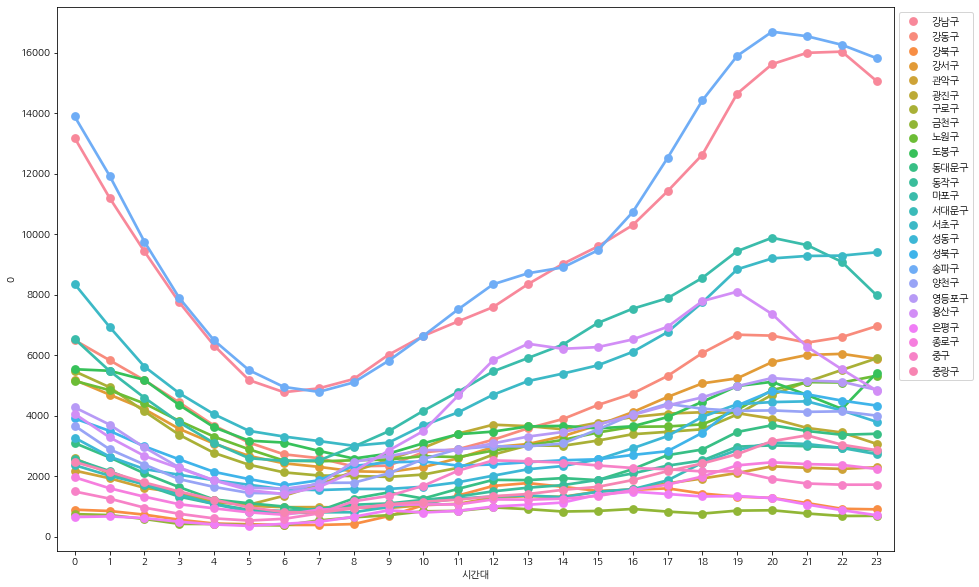

In [206]:
plt.figure(figsize = (15,10))
sns.pointplot(data= gu_time, x='시간대', y=0,hue = '자치구')
plt.legend(bbox_to_anchor = (1,1));

In [207]:
# 요일별 시간대별 충전 빈도수 분석

day_time = pd.DataFrame(pd.pivot_table(df, index = '요일', values = time_list, aggfunc = 'sum').stack()).reset_index().rename(columns = {'level_1' : '시간대'})
day_time.set_index('요일').loc[['월','화','수','목','금','토','일']].reset_index()

요일  시간대      0
0    월    0  15233
1    월    1  12771
2    월    2  10551
3    월    3   8673
4    월    4   7095
..  ..  ...    ...
163  일   19  17209
164  일   20  17007
165  일   21  16686
166  일   22  16097
167  일   23  15138

[168 rows x 3 columns]

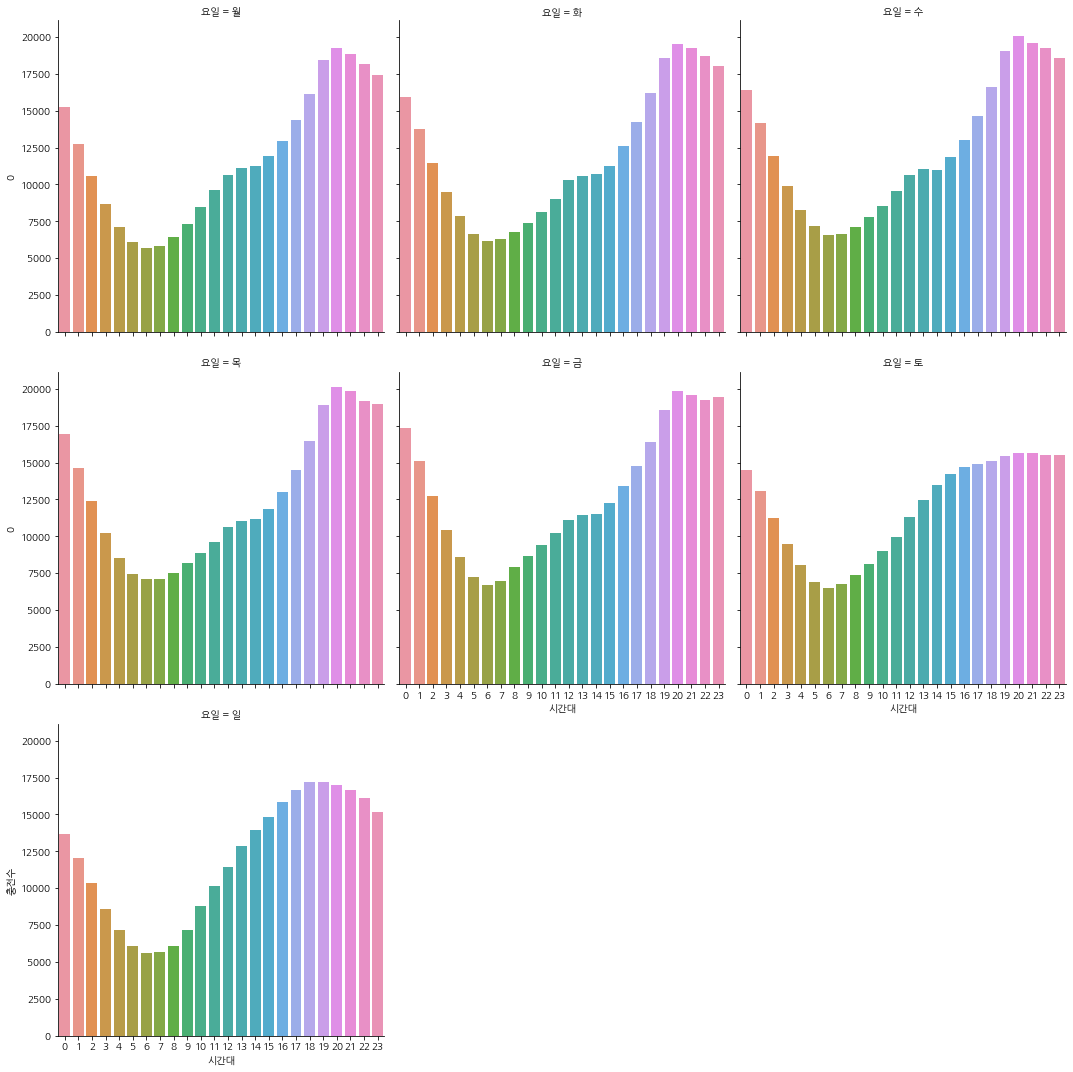

In [208]:
sns.catplot(data = day_time.set_index('요일').loc[['월','화','수','목','금','토','일']].reset_index(), x='시간대', y=0, ci = None, kind = 'bar', col = '요일', col_wrap = 3)
plt.ylabel('충전수');

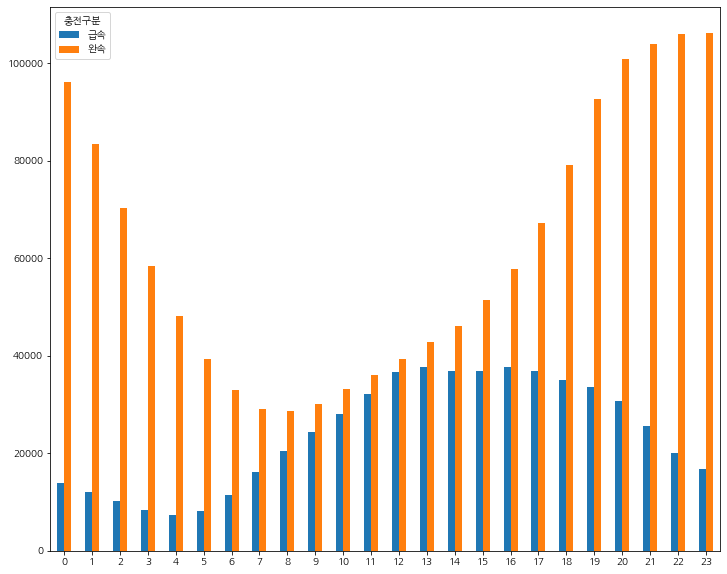

In [209]:
df.groupby('충전구분')[time_list].sum().T.plot.bar(figsize = (12,10), rot = 0);

In [210]:
df.groupby('충전소명')[['급속충전기(대)','완속충전기(대)']].mean().sum()

급속충전기(대)    576.0
완속충전기(대)    966.0
dtype: float64

## 주유소 VS 충전소

* 일반 주유소 개수와 전기차 충전소 개수 비교
- (일반 차량 : 주유소의 수)와 (전기차 : 충전소의 수)를 비교하여 충전소의 상대적 부족 여부를 파악한다.

### 서울시 주유소 현황

In [49]:
oil = pd.read_csv('https://raw.githubusercontent.com/cryptnomy/likelion-ai-s7-mid/master/data/20221020101743.csv')
oil

자치구별(1) 자치구별(2) 판매소별(1) 판매소별(2)  2011 2012 2013 2014 2015 2016 2017 2018  \
0        합계      소계      합계      소계  1005  955  920  853  816  774  751  721   
1        합계      소계      합계     주유소   663  641  621  596  568  552  538  524   
2        합계      소계      합계   용제판매소    66   56   51   37   39   33   30   26   
3        합계      소계      합계   일반판매소   270  252  242  214  204  183  176  163   
4        합계      소계      합계  항공유판매업     6    6    6    6    5    6    7    8   
..      ...     ...     ...     ...   ...  ...  ...  ...  ...  ...  ...  ...   
125      합계     강동구      합계      소계    39   38   36   34   28   27   26   25   
126      합계     강동구      합계     주유소    25   25   25   24   20   20   19   18   
127      합계     강동구      합계   용제판매소     1    1    1    1    -    -    -    -   
128      합계     강동구      합계   일반판매소    13   12   10    9    8    7    7    7   
129      합계     강동구      합계  항공유판매업     -    -    -    -    -    -    -    -   

    2019 2020 2021  
0    697  679  637  
1    505  499  468  
2     24   24   19  
3    158  146  137  
4     10   10   13  
..   ...  ...  ...  
125   23   22   19  
126   16   16   14  
127    -    -    -  
128    7    6    5  
129    -    -  NaN  

[130 rows x 15 columns]

In [50]:
oil = oil[~oil['자치구별(2)'].str.contains('소계')]
oil = oil[oil['판매소별(2)'].str.startswith('주유소')]
oil = oil.drop(["자치구별(1)", "판매소별(1)", "2011","2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"], axis=1)

In [51]:
oil = oil.rename(columns = {"자치구별(2)" : "자치구", "판매소별(2)" : "판매소 유형", "2021" : "2021주유소 현황"})
oil

자치구 판매소 유형 2021주유소 현황
6     종로구    주유소          9
11     중구    주유소         10
16    용산구    주유소         13
21    성동구    주유소         17
26    광진구    주유소         15
31   동대문구    주유소         19
36    중랑구    주유소         14
41    성북구    주유소         24
46    강북구    주유소         13
51    도봉구    주유소         18
56    노원구    주유소         15
61    은평구    주유소         17
66   서대문구    주유소         15
71    마포구    주유소         12
76    양천구    주유소         25
81    강서구    주유소         32
86    구로구    주유소         21
91    금천구    주유소         12
96   영등포구    주유소         27
101   동작구    주유소         10
106   관악구    주유소         15
111   서초구    주유소         33
116   강남구    주유소         35
121   송파구    주유소         33
126   강동구    주유소         14

### 주유기 데이터로 주유기 개수로 변환
- 서울시 전체의 주유기 대수 데이터가 존재하지 않는다.
- 존재하는 데이터는 성북구의 주유소 별 주유기 대수 데이터 뿐이다.
- 해당 데이터를 이용해 한 주유소에 있는 주유기의 평균 개수를 구하고, 이를 서울 전역의 주유기 평균 개수로 이용한다.

In [120]:
oil_machine = pd.read_csv('https://raw.githubusercontent.com/cryptnomy/likelion-ai-s7-mid/master/data/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C_%EC%84%B1%EB%B6%81%EA%B5%AC_%EC%A3%BC%EC%9C%A0%EC%86%8C_%ED%98%84%ED%99%A9_20210101.csv', encoding = 'cp949')
oil_machine.head(3)

구분    정유사                  상호               주소  주유기수          전화번호 셀프주유  \
0  주유소     GS               동일주유소   서울시 성북구 보문로 85     8   02-923-4949  NaN   
1  주유소     HD  현대오일뱅크(주)직영 아리랑주유소  서울시 성북구 아리랑로 96     4   02-941-5189  NaN   
2  주유소  S-oil               장위주유소  서울시 성북구 화랑로 110     4  02-6498-5189   가능   

  세차장        등록일자         위도          경도   행정동  
0   유  1976-04-30  37.582958  127.020374   보문동  
1   유  1976-04-30  37.600535  127.014214  정릉1동  
2   유  1976-05-07  37.603465  127.043446  월곡2동

In [121]:
mean_oil = oil_machine['주유기수'].mean()
mean_oil

4.875

In [122]:
oil['주유기수'] = oil['2021주유소 현황'].astype(int).map(lambda x : round(x * mean_oil))
oil

자치구 판매소 유형 2021주유소 현황  주유기수
6     종로구    주유소          9    44
11     중구    주유소         10    49
16    용산구    주유소         13    63
21    성동구    주유소         17    83
26    광진구    주유소         15    73
31   동대문구    주유소         19    93
36    중랑구    주유소         14    68
41    성북구    주유소         24   117
46    강북구    주유소         13    63
51    도봉구    주유소         18    88
56    노원구    주유소         15    73
61    은평구    주유소         17    83
66   서대문구    주유소         15    73
71    마포구    주유소         12    58
76    양천구    주유소         25   122
81    강서구    주유소         32   156
86    구로구    주유소         21   102
91    금천구    주유소         12    58
96   영등포구    주유소         27   132
101   동작구    주유소         10    49
106   관악구    주유소         15    73
111   서초구    주유소         33   161
116   강남구    주유소         35   171
121   송파구    주유소         33   161
126   강동구    주유소         14    68

### 서울시 자동차 등록 대수

In [123]:
cc=pd.read_csv("https://raw.githubusercontent.com/cryptnomy/likelion-ai-s7-mid/master/data/20221020162020.csv")

In [124]:
cc.head(5)

자치구별(1)  자치구별(2)     2021 2021.1   2021.2  2021.3   2021.4 2021.5   2021.6  \
0  자치구별(1)  자치구별(2)       합계     합계       합계      합계       합계     합계       합계   
1  자치구별(1)  자치구별(2)       소계     소계       소계      소계      승용차    승용차      승용차   
2  자치구별(1)  자치구별(2)        계     관용      자가용     영업용        계     관용      자가용   
3      서울시       소계  3176743  12747  2958799  205197  2740044   4646  2609340   
4      서울시      종로구    50348   3872    44523    1953    41475   1736    38996   

   2021.7  ... 2021.14 2021.15 2021.16 2021.17 2021.18 2021.19 2021.20  \
0      합계  ...      합계      합계      합계      합계      합계      합계      합계   
1     승용차  ...     화물차     화물차     특수차     특수차     특수차     특수차     이륜차   
2     영업용  ...     자가용     영업용       계      관용     자가용     영업용       계   
3  126058  ...  263488   58976    9871     397    4387    5087  433020   
4     743  ...    3806     889     231      99      67      65   13121   

  2021.21 2021.22 2021.23  
0      합계      합계      합계  
1     이륜차     이륜차     이륜차  
2      관용     자가용     영업용  
3    4381  428639       -  
4     432   12689       -  

[5 rows x 26 columns]

In [125]:
cc = cc[~cc['자치구별(2)'].str.startswith("소계")]
cc = cc[~cc['자치구별(2)'].str.startswith("자치구별(2)")]
cc = cc.drop(["자치구별(1)", "2021.1", "2021.2" , "2021.3" , "2021.4", "2021.5", "2021.6", "2021.7", "2021.8", "2021.9", "2021.10", "2021.11", "2021.12", "2021.13", "2021.14", "2021.15", "2021.16", "2021.17", "2021.18", "2021.19", "2021.20", "2021.21", "2021.22", "2021.23"], axis=1)

In [126]:
cc = cc.rename(columns = {"자치구별(2)" : "자치구", "2021" : "2021등록된자동차"})
cc.sample(10)

자치구 2021등록된자동차
10   중랑구     114375
29    기타          -
6    용산구      79740
14   노원구     152285
16  서대문구      89199
7    성동구     107564
11   성북구     121073
21   금천구      90169
12   강북구      75337
28   강동구     152178

In [127]:
oil_cc = pd.merge(oil,cc, how="left")
oil_cc

자치구 판매소 유형 2021주유소 현황  주유기수 2021등록된자동차
0    종로구    주유소          9    44      50348
1     중구    주유소         10    49      61158
2    용산구    주유소         13    63      79740
3    성동구    주유소         17    83     107564
4    광진구    주유소         15    73      98371
5   동대문구    주유소         19    93      98466
6    중랑구    주유소         14    68     114375
7    성북구    주유소         24   117     121073
8    강북구    주유소         13    63      75337
9    도봉구    주유소         18    88      95631
10   노원구    주유소         15    73     152285
11   은평구    주유소         17    83     133175
12  서대문구    주유소         15    73      89199
13   마포구    주유소         12    58     121364
14   양천구    주유소         25   122     151338
15   강서구    주유소         32   156     205058
16   구로구    주유소         21   102     145874
17   금천구    주유소         12    58      90169
18  영등포구    주유소         27   132     146095
19   동작구    주유소         10    49     106229
20   관악구    주유소         15    73     118082
21   서초구    주유소         33   161     177133
22   강남구    주유소         35   171     239643
23   송파구    주유소         33   161     246858
24   강동구    주유소         14    68     152178

#### 주유기 당 자동차

In [131]:
oil_cc["주유기 당 자동차"] = oil_cc["2021등록된자동차"].astype(int)/oil_cc["주유기수"]
oil_cc["주유기 당 자동차"] = round(oil_cc["주유기 당 자동차"], 2)

In [132]:
oil_cc.sample(3)

자치구 판매소 유형 2021주유소 현황  주유기수 2021등록된자동차  주유기 당 자동차
10   노원구    주유소         15    73     152285    2086.10
18  영등포구    주유소         27   132     146095    1106.78
7    성북구    주유소         24   117     121073    1034.81

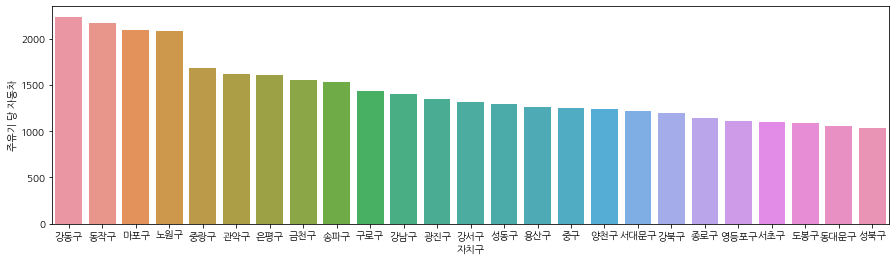

In [133]:
plt.figure(figsize=(15,4))
sns.barplot(data=oil_cc.sort_values('주유기 당 자동차', ascending = False), x="자치구", y="주유기 당 자동차", ci=None);

## 전기차 대수 데이터

In [134]:
ee_car = pd.read_csv('https://raw.githubusercontent.com/cryptnomy/likelion-ai-s7-mid/master/data/seoul-any-gu-ev.csv', encoding = 'cp949')

In [135]:
ee_car

연월별 시군구별 연료별   용도별  승    용  승    합  화    물  특    수      계
0    2017-12-31  종로구  전기  비사업용      73       0       2       0     75
1    2017-12-31  중 구  전기  비사업용     106       1       2       0    109
2    2017-12-31  중 구  전기   사업용       1       0       0       0      1
3    2017-12-31  용산구  전기  비사업용      67       0       0       0     67
4    2017-12-31  성동구  전기  비사업용      85       0       1       0     86
..          ...  ...  ..   ...     ...     ...     ...     ...    ...
287  2022-07-31  강남구  전기   사업용   10241       3     125       0  10369
288  2022-07-31  송파구  전기  비사업용    1771       7     211       2   1991
289  2022-07-31  송파구  전기   사업용     306       1     242       0    549
290  2022-07-31  강동구  전기  비사업용    1036       1     145       0   1182
291  2022-07-31  강동구  전기   사업용     314      36     188       0    538

[292 rows x 9 columns]

In [136]:
ee_car['시군구별'] = ee_car['시군구별'].str.replace('중 구', '중구')

In [137]:
ee_car = ee_car[ee_car['연월별'] == '2021-12-31'][['시군구별','계']]

In [138]:
ee_car_mount = pd.DataFrame(ee_car.groupby('시군구별')['계'].sum()).reset_index()
ee_car_mount = ee_car_mount.rename(columns = {'시군구별' : '자치구'})

In [139]:
ee_car_mount

자치구      계
0    강남구  11432
1    강동구   1273
2    강북구    496
3    강서구   1679
4    관악구    730
5    광진구    590
6    구로구   3733
7    금천구    530
8    노원구    889
9    도봉구    637
10  동대문구    656
11   동작구    710
12   마포구   1062
13  서대문구    663
14   서초구   3616
15   성동구   1494
16   성북구    900
17   송파구   1932
18   양천구    989
19  영등포구   2409
20   용산구    957
21   은평구    881
22   종로구    606
23    중구    950
24   중랑구    750

In [140]:
ee_station = df.groupby('자치구')['충전소명'].nunique().copy()
ee_station = pd.DataFrame(ee_station).reset_index()
ee_station = ee_station.rename(columns = {'충전소명' : '충전소수'})

In [207]:
ee_per = pd.merge(ee_car_mount,ee_station,on='자치구')
ee_per = ee_per.rename(columns = {"계" : "자치구별 전기차 대수"})

In [208]:
# 자치구별 충전기 개수
gu_charger = df.groupby(['자치구','충전소명'])[['급속충전기(대)','완속충전기(대)']].mean().groupby('자치구').sum().reset_index()
gu_charger['총 충전기수'] = gu_charger['급속충전기(대)'] + gu_charger['완속충전기(대)']
gu_charger

자치구  급속충전기(대)  완속충전기(대)  총 충전기수
0    강남구      38.0      81.0   119.0
1    강동구      30.0      56.0    86.0
2    강북구      12.0      16.0    28.0
3    강서구      24.0      43.0    67.0
4    관악구      11.0      17.0    28.0
5    광진구      17.0      18.0    35.0
6    구로구      23.0      52.0    75.0
7    금천구       8.0       2.0    10.0
8    노원구      34.0      60.0    94.0
9    도봉구      27.0      43.0    70.0
10  동대문구      19.0      16.0    35.0
11   동작구      14.0      26.0    40.0
12   마포구      29.0      68.0    97.0
13  서대문구      15.0      18.0    33.0
14   서초구      38.0      71.0   109.0
15   성동구      36.0      30.0    66.0
16   성북구      27.0      42.0    69.0
17   송파구      43.0      85.0   128.0
18   양천구      21.0      33.0    54.0
19  영등포구      24.0      58.0    82.0
20   용산구      27.0      49.0    76.0
21   은평구       5.0      11.0    16.0
22   종로구       8.0      22.0    30.0
23    중구      29.0      22.0    51.0
24   중랑구      17.0      27.0    44.0

In [209]:
ee_per = pd.merge(ee_per , gu_charger)
ee_per

자치구  자치구별 전기차 대수  충전소수  급속충전기(대)  완속충전기(대)  총 충전기수
0    강남구        11432    54      38.0      81.0   119.0
1    강동구         1273    34      30.0      56.0    86.0
2    강북구          496     9      12.0      16.0    28.0
3    강서구         1679    27      24.0      43.0    67.0
4    관악구          730    16      11.0      17.0    28.0
5    광진구          590    12      17.0      18.0    35.0
6    구로구         3733    30      23.0      52.0    75.0
7    금천구          530     6       8.0       2.0    10.0
8    노원구          889    41      34.0      60.0    94.0
9    도봉구          637    34      27.0      43.0    70.0
10  동대문구          656    15      19.0      16.0    35.0
11   동작구          710    18      14.0      26.0    40.0
12   마포구         1062    34      29.0      68.0    97.0
13  서대문구          663    14      15.0      18.0    33.0
14   서초구         3616    48      38.0      71.0   109.0
15   성동구         1494    18      36.0      30.0    66.0
16   성북구          900    25      27.0      42.0    69.0
17   송파구         1932    43      43.0      85.0   128.0
18   양천구          989    25      21.0      33.0    54.0
19  영등포구         2409    25      24.0      58.0    82.0
20   용산구          957    22      27.0      49.0    76.0
21   은평구          881     8       5.0      11.0    16.0
22   종로구          606    13       8.0      22.0    30.0
23    중구          950    18      29.0      22.0    51.0
24   중랑구          750    19      17.0      27.0    44.0

In [210]:
ee_per['충전기 당 전기차'] = ee_per['자치구별 전기차 대수'] / ee_per['총 충전기수']
ee_per

자치구  자치구별 전기차 대수  충전소수  급속충전기(대)  완속충전기(대)  총 충전기수  충전기 당 전기차
0    강남구        11432    54      38.0      81.0   119.0  96.067227
1    강동구         1273    34      30.0      56.0    86.0  14.802326
2    강북구          496     9      12.0      16.0    28.0  17.714286
3    강서구         1679    27      24.0      43.0    67.0  25.059701
4    관악구          730    16      11.0      17.0    28.0  26.071429
5    광진구          590    12      17.0      18.0    35.0  16.857143
6    구로구         3733    30      23.0      52.0    75.0  49.773333
7    금천구          530     6       8.0       2.0    10.0  53.000000
8    노원구          889    41      34.0      60.0    94.0   9.457447
9    도봉구          637    34      27.0      43.0    70.0   9.100000
10  동대문구          656    15      19.0      16.0    35.0  18.742857
11   동작구          710    18      14.0      26.0    40.0  17.750000
12   마포구         1062    34      29.0      68.0    97.0  10.948454
13  서대문구          663    14      15.0      18.0    33.0  20.090909
14   서초구         3616    48      38.0      71.0   109.0  33.174312
15   성동구         1494    18      36.0      30.0    66.0  22.636364
16   성북구          900    25      27.0      42.0    69.0  13.043478
17   송파구         1932    43      43.0      85.0   128.0  15.093750
18   양천구          989    25      21.0      33.0    54.0  18.314815
19  영등포구         2409    25      24.0      58.0    82.0  29.378049
20   용산구          957    22      27.0      49.0    76.0  12.592105
21   은평구          881     8       5.0      11.0    16.0  55.062500
22   종로구          606    13       8.0      22.0    30.0  20.200000
23    중구          950    18      29.0      22.0    51.0  18.627451
24   중랑구          750    19      17.0      27.0    44.0  17.045455

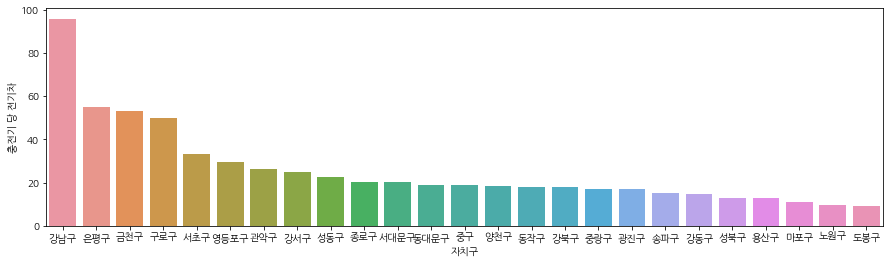

In [211]:
plt.figure(figsize=(15,4))
sns.barplot(data=ee_per.sort_values("충전기 당 전기차", ascending= False), x="자치구", y="충전기 당 전기차", ci=None);

### 주유소와 충전소 비교

In [212]:
fuel_ee = pd.merge(oil_cc[['자치구','주유기 당 자동차']], ee_per[['자치구','충전기 당 전기차']], on ='자치구')
fuel_ee.sort_values('주유기 당 자동차', ascending = False)

자치구  주유기 당 자동차  충전기 당 전기차
24   강동구    2237.91  14.802326
19   동작구    2167.94  17.750000
13   마포구    2092.48  10.948454
10   노원구    2086.10   9.457447
6    중랑구    1681.99  17.045455
20   관악구    1617.56  26.071429
11   은평구    1604.52  55.062500
17   금천구    1554.64  53.000000
23   송파구    1533.28  15.093750
16   구로구    1430.14  49.773333
22   강남구    1401.42  96.067227
4    광진구    1347.55  16.857143
15   강서구    1314.47  25.059701
3    성동구    1295.95  22.636364
2    용산구    1265.71  12.592105
1     중구    1248.12  18.627451
14   양천구    1240.48  18.314815
12  서대문구    1221.90  20.090909
8    강북구    1195.83  17.714286
0    종로구    1144.27  20.200000
18  영등포구    1106.78  29.378049
21   서초구    1100.20  33.174312
9    도봉구    1086.72   9.100000
5   동대문구    1058.77  18.742857
7    성북구    1034.81  13.043478

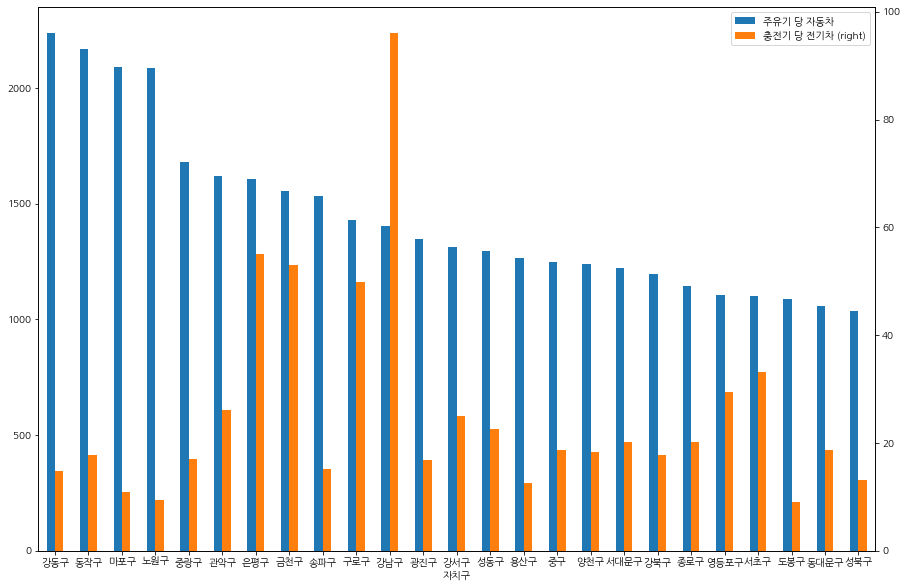

In [213]:
fuel_ee.sort_values('주유기 당 자동차', ascending =False).plot.bar(figsize = (15,10), x = '자치구', secondary_y ='충전기 당 전기차', rot = 0);

In [214]:
(fuel_ee['주유기 당 자동차'] / fuel_ee['충전기 당 전기차']).mean()

79.40279153129217

In [215]:
fuel_ee.groupby('자치구').sum().sum().T

주유기 당 자동차    36069.540000
충전기 당 전기차      640.603389
dtype: float64

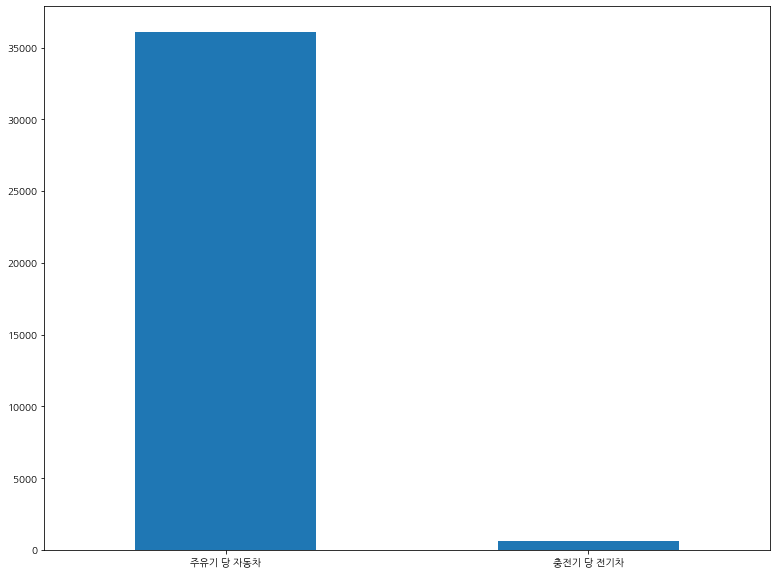

In [216]:
#전체 주유소 & 충전소 개수 비교
fuel_ee.groupby('자치구').sum().sum().plot.bar(rot=0, figsize = (13,10));

In [217]:
new = pd.merge(oil_cc, ee_per, on="자치구")

In [218]:
new_corr = new.corr()

In [219]:
mask = np.triu(np.ones_like(new.corr()))

In [220]:
new.head(5)

자치구 판매소 유형 2021주유소 현황  주유기수 2021등록된자동차  주유기 당 자동차  자치구별 전기차 대수  충전소수  \
0  종로구    주유소          9    44      50348    1144.27          606    13   
1   중구    주유소         10    49      61158    1248.12          950    18   
2  용산구    주유소         13    63      79740    1265.71          957    22   
3  성동구    주유소         17    83     107564    1295.95         1494    18   
4  광진구    주유소         15    73      98371    1347.55          590    12   

   급속충전기(대)  완속충전기(대)  총 충전기수  충전기 당 전기차  
0       8.0      22.0    30.0  20.200000  
1      29.0      22.0    51.0  18.627451  
2      27.0      49.0    76.0  12.592105  
3      36.0      30.0    66.0  22.636364  
4      17.0      18.0    35.0  16.857143

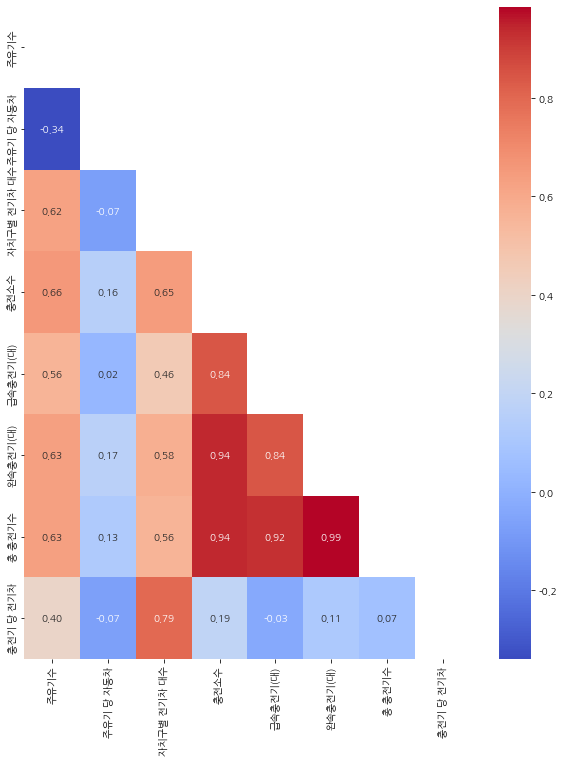

In [221]:
# 일반 자동차 등록대수 대비 주유소 & 전기차 대비 충전소의 상관관계
plt.figure(figsize=(10, 12))
sns.heatmap(new.corr(), cmap="coolwarm", annot=True, fmt=".2f", mask=mask);

## 지도로 시각화

In [222]:
import folium
maps = folium.Map(location = [37.5759,126.9768], zoom_start = 11)

In [223]:
gu_maps = folium.Map(location = [37.5759,126.9768], zoom_start = 11)

In [224]:
cluster_maps = folium.Map(location = [37.5759,126.9768], zoom_start = 11)

In [225]:
df_map = pd.DataFrame(df['충전소명'].unique()).rename(columns = {0 : '충전소명'})
df_map = pd.merge(df_map, df.groupby(['충전소명','위도','경도','급속충전기(대)','완속충전기(대)']).mean().reset_index()[['위도','경도','충전소명','급속충전기(대)','완속충전기(대)']], on ='충전소명')
df_map

충전소명         위도          경도  급속충전기(대)  완속충전기(대)
0          영등포전력지사  37.517368  126.910233         1         2
1        명일동 공영주차장  37.551193  127.142921         2         0
2    송파파크데일1단지 아파트  37.498787  127.158104         1         2
3             송파구청  37.514473  127.105461         1         0
4          송파삼성래미안  37.504230  127.119148         1         3
..             ...        ...         ...       ...       ...
605        돈암더샵아파트  37.597878  127.010330         1         0
606         북서울꿈의숲  37.621544  127.041290         2         0
607      현대백화점 미아점  37.608452  127.028748         4         0
608       강북문화예술회관  37.640789  127.013428         1         0
609        서울전력관리처  37.560734  126.987793         1         2

[610 rows x 5 columns]

In [226]:
df_map = pd.merge(df.groupby(['자치구','충전소명']).sum().reset_index()[['자치구','충전소명']], df_map)
df_map

자치구          충전소명         위도          경도  급속충전기(대)  완속충전기(대)
0    강남구     LH강남힐스테이트  37.471027  127.088783         1         4
1    강남구        LH서울지사  37.514473  127.040863         1         0
2    강남구         가람아파트  37.481773  127.085609         1         0
3    강남구    강남구청 공영주차장  37.517704  127.046822         1         0
4    강남구       강남데시앙파크  37.461044  127.101540         1         1
..   ...           ...        ...         ...       ...       ...
605  중랑구    우림골목시장 주차장  37.596756  127.098274         1         0
606  중랑구     중랑숲리가 아파트  37.602798  127.105583         1         2
607  중랑구     중랑해모로 아파트  37.602966  127.110191         0         2
608  중랑구  태릉시장 중화공영주차장  37.597534  127.074776         2         0
609  중랑구    한일써너스빌 아파트  37.597382  127.091545         1         1

[610 rows x 6 columns]

In [227]:
df_gu_map= pd.merge(df_map.groupby('자치구')[['급속충전기(대)','완속충전기(대)']].sum().reset_index(), df_map.groupby('자치구')['충전소명'].count().reset_index())
df_gu_map

자치구  급속충전기(대)  완속충전기(대)  충전소명
0    강남구        38        81    54
1    강동구        30        56    34
2    강북구        12        16     9
3    강서구        24        43    27
4    관악구        11        18    17
5    광진구        17        18    12
6    구로구        23        52    30
7    금천구         8         2     6
8    노원구        34        60    41
9    도봉구        27        43    34
10  동대문구        19        16    15
11   동작구        14        26    18
12   마포구        29        70    35
13  서대문구        15        18    14
14   서초구        38        71    48
15   성동구        36        30    18
16   성북구        27        42    25
17   송파구        43        85    43
18   양천구        21        33    25
19  영등포구        24        58    25
20   용산구        27        49    22
21   은평구         5        11     8
22   종로구         8        22    13
23    중구        29        22    18
24   중랑구        17        27    19

In [228]:
gu_loc = """강남구 37.5172 127.0473
강동구 37.5301 127.1238
강북구 37.6398 127.0255
강서구 37.5510 126.8495
관악구 37.4781 126.9515
광진구 37.5384 127.0822
구로구 37.4955 126.8876
금천구 37.4519 126.9020
노원구 37.6543 127.0575
도봉구 37.6688 127.0471
동대문구 37.5742 127.0398
동작구 37.5124 126.9393
마포구 37.5634 126.9034
서대문구 37.5793 126.9365
서초구 37.4836 127.0327
성동구 37.5634 127.0369
성북구 37.5894 127.0167
송파구 37.5117 127.1059
양천구 37.5170 126.8666
영등포구 37.5263 126.8963
용산구 37.5323 126.9907
은평구 37.6015 126.9304
종로구 37.5735 126.9790
중구 37.5641 126.9979
중랑구 37.6063 127.0932"""

In [229]:
gu_df = pd.DataFrame(gu_loc.split('\n'))[0].str.split(expand = True)
gu_df.columns = ['자치구', '위도','경도']
df_gu_map = pd.merge(df_gu_map, gu_df)

In [230]:
import requests
geo_data = requests.get('https://raw.githubusercontent.com/cubensys/Korea_District/master/3_%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%9E%90%EC%B9%98%EA%B5%AC/%EC%84%9C%EC%9A%B8_%EC%9E%90%EC%B9%98%EA%B5%AC_%EA%B2%BD%EA%B3%84_2017.geojson').json()

In [231]:
folium.Choropleth(
    geo_data = geo_data,
    data = df_gu_map,
    columns = ('자치구', '충전소명'),
    key_on="feature.properties.SIG_KOR_NM",
    fill_color = 'BuPu',
    legend_name = '충전소 수',
).add_to(gu_maps)

folium.Choropleth(
    geo_data = geo_data,
    data = df_gu_map,
    columns = ('자치구', '충전소명'),
    key_on="feature.properties.SIG_KOR_NM",
    fill_color = 'BuPu',
    legend_name = '충전소 수',
).add_to(maps)

folium.Choropleth(
    geo_data = geo_data,
    data = df_gu_map,
    columns = ('자치구', '충전소명'),
    key_on="feature.properties.SIG_KOR_NM",
    fill_color = 'BuPu',
    legend_name = '충전소 수',
).add_to(cluster_maps)

In [232]:
for i, row in df_map.iterrows():
    iframe = folium.IFrame('충전소명 : '+ row['충전소명'] + '<br>' +'급속충전기 : ' + str(row['급속충전기(대)']) + '<br>' + '완속충전기 : '+ str(row['완속충전기(대)']))
    popup = folium.Popup(iframe,min_width=200, max_width=300)
    
    folium.Circle([row['위도'],row['경도']],
                  radius = 100,
                  color = 'red',
                  fill_color = 'crimson',
                  popup = popup).add_to(maps)

In [233]:
for i, row in df_gu_map.iterrows():
    iframe = folium.IFrame('자치구명 : '+ row['자치구'] + '<br>' +'급속충전기 : ' + str(row['급속충전기(대)']) + '<br>' + '완속충전기 : '+ str(row['완속충전기(대)']))
    popup = folium.Popup(iframe,min_width=200, max_width=300)
    
    folium.Circle([row['위도'],row['경도']],
                  radius = 150,
                  color = 'red',
                  fill_color = 'crimson',
                  popup = popup).add_to(gu_maps)

In [234]:
from folium.plugins import MarkerCluster
mc = MarkerCluster()

for i, row in df_map.iterrows():
    
    iframe = folium.IFrame('충전소명 : '+ row['충전소명'] + '<br>' +'급속충전기 : ' + str(row['급속충전기(대)']) + '<br>' + '완속충전기 : '+ str(row['완속충전기(대)']))
    popup = folium.Popup(iframe,min_width=200, max_width=300)
    
    mc.add_child(
        folium.Marker(location = [row['위도'], row['경도']],
               popup= popup
              )
    )

mc.add_to(cluster_maps)

In [235]:
maps

In [236]:
cluster_maps

In [237]:
gu_maps

In [238]:
maps.save('seoul_chargers.html')

In [239]:
cluster_maps.save('seoul_charger_cluster.html')

In [240]:
gu_maps.save('seoul_gu_charger.html')